<a href="https://colab.research.google.com/github/tackulus/229351/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Download file
!wget -O Carseats.csv "https://donlapark.github.io/ds351/data/Carseats.csv"

--2021-01-20 04:59:04--  https://donlapark.github.io/ds351/data/Carseats.csv
Resolving donlapark.github.io (donlapark.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to donlapark.github.io (donlapark.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19044 (19K) [text/csv]
Saving to: ‘Carseats.csv’

Carseats.csv        100%[===================>]  18.60K  --.-KB/s    in 0s      

2021-01-20 04:59:04 (96.8 MB/s) - ‘Carseats.csv’ saved [19044/19044]



In [19]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

raw = pd.read_csv('Carseats.csv')
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [20]:
raw

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [27]:
df = raw.copy()

mapper = lambda x: 1 if x.lower() == 'yes' else 0

df[['Urban', 'US']] = df[['Urban', 'US']].applymap(mapper)
#df.rename(columns={'Urban': 'ResidenceUrban', 'US': 'ResidenceUS'}, inplace=True)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


(a) Fit a multiple regression model to predict Sales using Price ,Urban, and US.

In [29]:
model = smf.ols("Sales ~ Price + Urban + US", df)
resA = model.fit()
print(resA.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           2.39e-23
Time:                        05:09:49   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.0

(c) Write out the model in equation form, being careful to handle the qualitative variables properly.

$$ \widehat{Sales} = \hat\beta_0 + \hat\beta_1 \times \text{Price} + \hat\beta_2 \times \text{Urban} + \hat\beta_3 \times \text{US}, $$

$$ (\hat\beta_0, \hat\beta_1, \hat\beta_2, \hat\beta_3) = (13.0435, -0.0545, -0.0219, 1.2006) $$

(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [ ]:
model = smf.ols("Sales ~ Price + US", df)
resE = model.fit()
print(resE.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           2.66e-24
Time:                        20:38:03   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

(f) How well do the models in (a) and (e) fit the data?

$$ \text{RSE}_{(a)} = 2.472, R^2_{(a)} = 0.239 $$
$$ \text{RSE}_{(e)} = 2.469, R^2_{(e)} = 0.239 $$

In [ ]:
def RSE(res):
    RSS = np.sum( np.square(df.Sales - res.predict()) )
    n = len(df)
    p = len(res.params) - 1
    RSE = np.sqrt( RSS / (n - p - 1) )
    return RSE

In [ ]:
pd.DataFrame({'(a)': [RSE(resA), resA.rsquared],
              '(e)': [RSE(resE), resE.rsquared]},
             index=['RSE', 'R-squared'])

,(a),(e)
RSE,2.472492,2.469397
R-squared,0.239275,0.239263


(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

$$ I_0 = [11.79032, 14.271265] $$

$$ I_1 = [-0.06476, -0.044195] $$

$$ I_2 = [ 0.69152,  1.707766] $$

In [ ]:
result.conf_int(alpha=0.05)

,0,1
Intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US,0.69152,1.707766


(h) Is there evidence of outliers or high leverage observations in the model from (e)?

In [ ]:
import matplotlib.pyplot as plt

def ResidualPlot(res):
    plt.scatter(x=res.predict(), y=df.Sales-res.predict(),
                facecolor='none', edgecolor='black')
    plt.axhline(y=0, ls='--', color='black')
    plt.show()

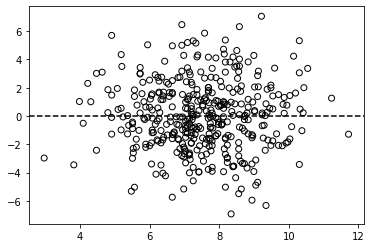

In [ ]:
ResidualPlot(resA)

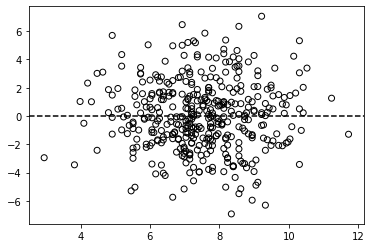

In [ ]:
ResidualPlot(resE)

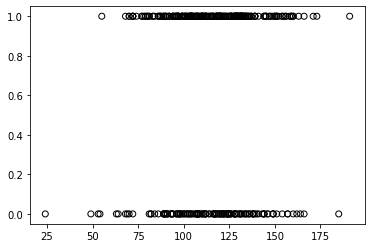

In [ ]:
plt.scatter(x=df.Price, y=df.US,
            facecolor='none', edgecolor='black')
plt.show()